#### Load libraries

In [41]:
from SALib.analyze import sobol ##sobol is a type of SA analysis implemented in SALib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Define Sobol Problem

In [42]:
input = {'uptake_rate_cancer': 1.0, 'secretion_rate_cancer':1.0, 'speed_cancer': 1.0, 'transformation_rate_cancer': 3e-5, 'relative_maximum_adhesion_distance_cancer': 0, 'cell_adhesion_affinity_cancer': 1,
         'speed_monocytes': 1.0, 'transformation_rate_monocytes': 95e-6, 'phagocytosis_rate_monocytes':25e-2, 'speed_macrophages': 1.0, 'phagocytosis_rate_macrophages':92e-2, 
         'attack_rate_macrophages': 5e-2, 'relative_maximum_adhesion_distance_macrophages': 0, 'cell_adhesion_affinity_macrophages': 1, 'speed_NLCs': 1.0, 'phagocytosis_rate_NLCs':4e-2, 
         'secretion_rate_apoptotic': 1.0, 'speed_apoptotic': 1.0, 'transformation_rate_apoptotic': 5e-05, 'secretion_rate_dead': 1.0}

default_values = list(input.values())

#Define the problem for SALib
problem = {
    'num_vars': len(default_values),
    'names': list(input.keys()),
    'bounds': np.array([[0, 0, 0, 3e-7, 0, 0, 0, 95e-7, 25e-4, 0, 92e-4, 5e-7, 0, 0, 0, 4e-4, 0, 0, 5e-4, 0],
                        [3, 3, 3, 3e-3, 3, 3, 3, 95e-3, 25e-1, 3, 92e-1, 5e-3, 3, 3, 3, 4e-1, 3, 3, 5e-1, 3]]).T # 100% percent of variation from default values 
}

#Number of samples N(D+2) where N:nsamples and D:ninputs. For sobol analysis N needs to be a power of 2, if not it will give error

experimental = np.loadtxt('../../Netlogo_NLCs-CLL/filtered_fused_9patients.csv', delimiter=",", skiprows=1)
time_points = experimental[:,0]

#### Load output from simulations (viability and concentration)

In [43]:
#Read output of simulation
viability_data_node1 = pd.read_csv('../data_output/Sensitivity_analysis/results/viability_1.csv', delimiter=",")
viability_data_node2 = pd.read_csv('../data_output/Sensitivity_analysis/results/viability_2.csv', delimiter=",")
viability_data_node3 = pd.read_csv('../data_output/Sensitivity_analysis/results/viability_3.csv', delimiter=",")
viability_data_node4 = pd.read_csv('../data_output/Sensitivity_analysis/results/viability_4.csv', delimiter=",")

concentration_data_node1 = pd.read_csv('../data_output/Sensitivity_analysis/results/concentration_1.csv', delimiter=",")
concentration_data_node2 = pd.read_csv('../data_output/Sensitivity_analysis/results/concentration_2.csv', delimiter=",")
concentration_data_node3 = pd.read_csv('../data_output/Sensitivity_analysis/results/concentration_3.csv', delimiter=",")
concentration_data_node4 = pd.read_csv('../data_output/Sensitivity_analysis/results/concentration_4.csv', delimiter=",")

viability_data = pd.concat([viability_data_node1, viability_data_node2, viability_data_node3, viability_data_node4], axis = 1) 
concentration_data = pd.concat([concentration_data_node1, concentration_data_node2, concentration_data_node3, concentration_data_node4], axis=1)


#### Run sobol analysis

#### Cell viability

In [44]:
#Sobol analysis is run by each time point and results are gathered in a matrix 
Si_S1 = []
Si_S1conf = []
Si_ST = []
Si_STconf = []
for i in range(0, viability_data.shape[0]):
    Si = sobol.analyze(problem, viability_data.iloc[i].values, print_to_console=False, calc_second_order=True)
    Si_S1.append(Si['S1'])
    Si_S1conf.append(Si['S1_conf'])
    Si_ST.append(Si['ST'])
    Si_STconf.append(Si['ST_conf']) 

/home/marcelo.hurtado/miniforge3/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/marcelo.hurtado/miniforge3/lib/python3.10/site-packages/SALib/analyze/sobol.py:216: UserWarning: Constant values encountered, indicating model evaluations (or subset of evaluations) produced identical values.
  warn(CONST_RESULT_MSG)
/home/marcelo.hurtado/miniforge3/lib/python3.10/site-packages/SALib/analyze/sobol.py:229: UserWarning: Constant values encountered, indicating model evaluations (or subset of evaluations) produced identical values.
  warn(CONST_RESULT_MSG)
/home/marcelo.hurtado/miniforge3/lib/python3.10/site-packages/SALib/analyze/sobol.py:239: UserWarning: Constant values encountered, indicating model evaluations (or subset of evaluations) produced identical values.
  warn(CONST_RESULT_MSG)
/home/m

In [45]:
Si_S1 = pd.DataFrame(Si_S1, columns=input.keys())
Si_S1conf = pd.DataFrame(Si_S1conf, columns=input.keys())
Si_ST = pd.DataFrame(Si_ST, columns=input.keys())
Si_STconf = pd.DataFrame(Si_STconf, columns=input.keys())

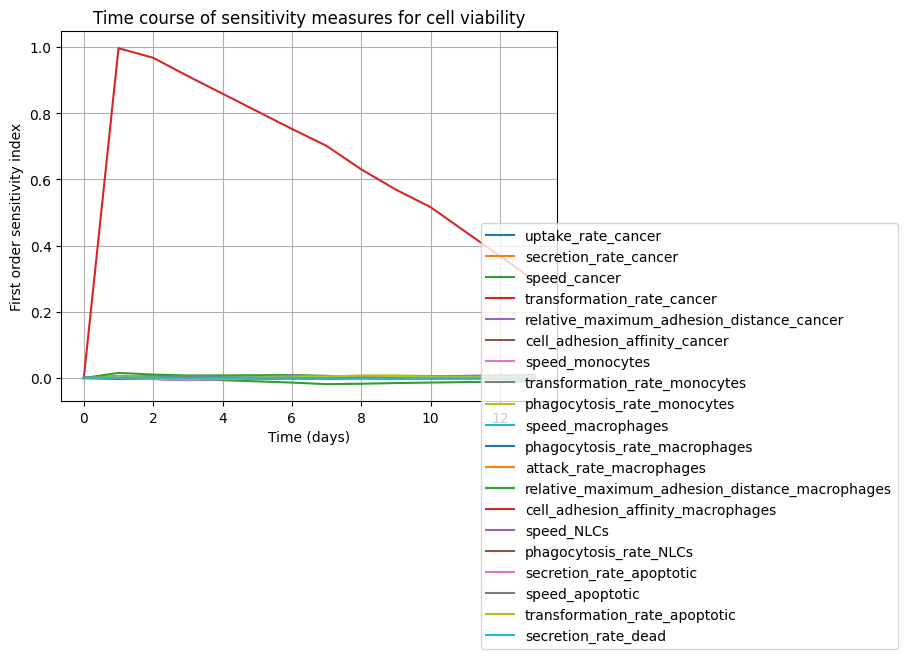

In [46]:
#### Sensitivity index First order
for param_index in range(Si_S1.shape[1]):
    plt.plot(time_points, Si_S1.iloc[:, param_index], label=Si_S1.columns[param_index])

plt.xlabel('Time (days)')
plt.ylabel('First order sensitivity index')
plt.title('Time course of sensitivity measures for cell viability')
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 0.5))

plt.grid(True)
plt.show()


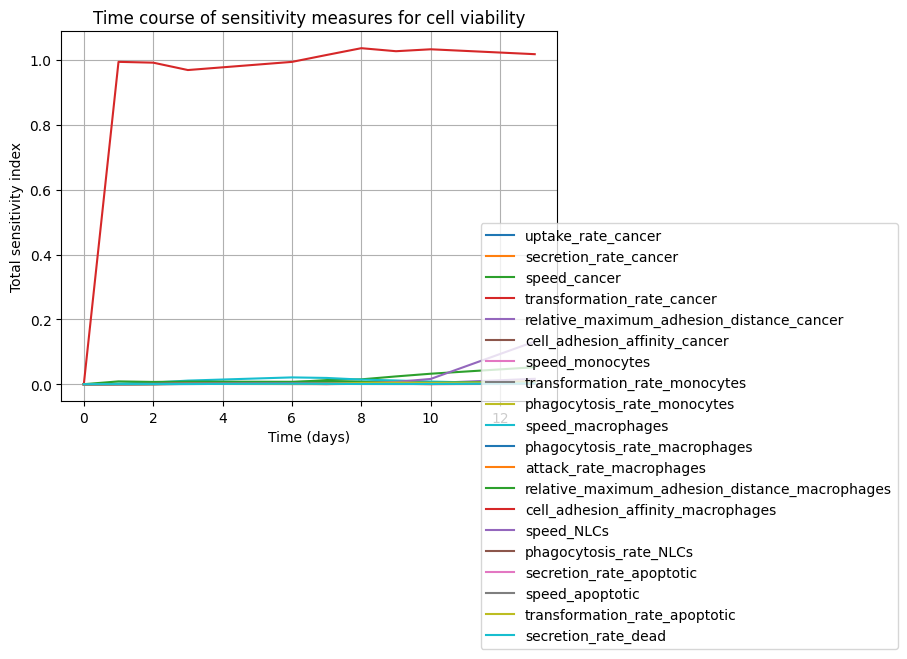

In [47]:
#### Sensitivity index Total
for param_index in range(Si_ST.shape[1]):
    plt.plot(time_points, Si_ST.iloc[:, param_index], label=Si_ST.columns[param_index])

plt.xlabel('Time (days)')
plt.ylabel('Total sensitivity index')
plt.title('Time course of sensitivity measures for cell viability')
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 0.5))

plt.grid(True)
plt.show()

#### Cell concentration

In [48]:
#Sobol analysis is run by each time point and results are gathered in a matrix 
Si_S1 = []
Si_S1conf = []
Si_ST = []
Si_STconf = []
for i in range(0, concentration_data.shape[0]):
    Si = sobol.analyze(problem, concentration_data.iloc[i].values, print_to_console=False, calc_second_order=True)
    Si_S1.append(Si['S1'])
    Si_S1conf.append(Si['S1_conf'])
    Si_ST.append(Si['ST'])
    Si_STconf.append(Si['ST_conf']) 

/home/marcelo.hurtado/miniforge3/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/marcelo.hurtado/miniforge3/lib/python3.10/site-packages/SALib/analyze/sobol.py:141: RuntimeWarning: invalid value encountered in divide
  Y = (Y - Y.mean()) / Y.std()


In [49]:
Si_S1 = pd.DataFrame(Si_S1, columns=input.keys())
Si_S1conf = pd.DataFrame(Si_S1conf, columns=input.keys())
Si_ST = pd.DataFrame(Si_ST, columns=input.keys())
Si_STconf = pd.DataFrame(Si_STconf, columns=input.keys())

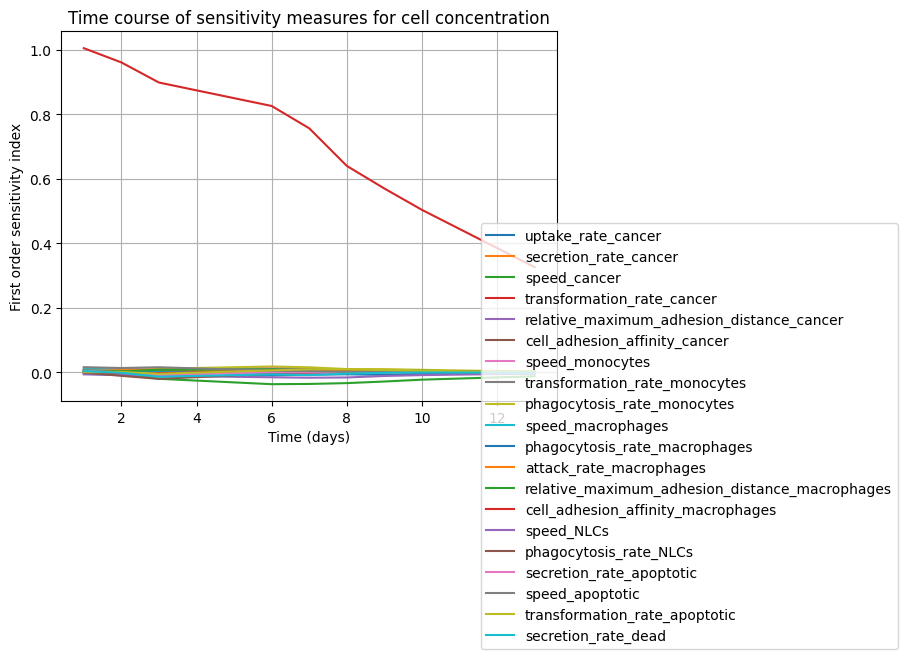

In [50]:
#### Sensitivity index First order
for param_index in range(Si_S1.shape[1]):
    plt.plot(time_points, Si_S1.iloc[:, param_index], label=Si_S1.columns[param_index])

plt.xlabel('Time (days)')
plt.ylabel('First order sensitivity index')
plt.title('Time course of sensitivity measures for cell concentration')
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 0.5))

plt.grid(True)
plt.show()

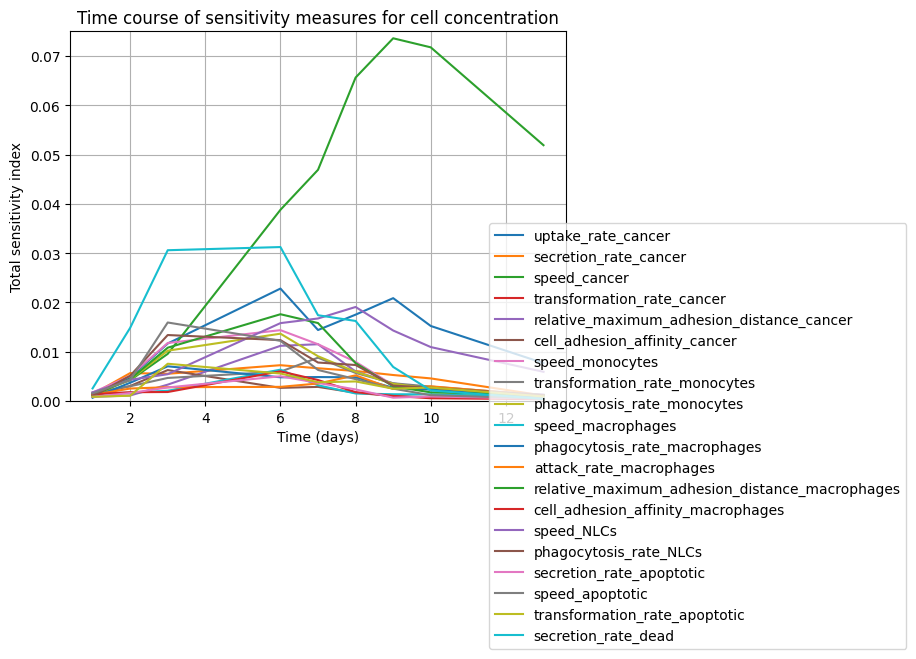

In [51]:
#### Sensitivity index Total
for param_index in range(Si_ST.shape[1]):
    plt.plot(time_points, Si_ST.iloc[:, param_index], label=Si_ST.columns[param_index])

plt.xlabel('Time (days)')
plt.ylabel('Total sensitivity index')
plt.title('Time course of sensitivity measures for cell concentration')
plt.ylim(0, 0.075)

plt.legend(loc='upper right', bbox_to_anchor=(1.7, 0.5))

plt.grid(True)
plt.show()